In [2]:
import pandas as pd
import numpy as np
import time
import requests
import matplotlib.pyplot as plt

In [3]:
path= "/Users/diogogoncalves/Documents/GitProjects/Personal/athletic-analysis/test_tutorial/Data/my_activities"
activities_df = pd.read_csv(path, sep=',')

In [4]:
path_gear = "/Users/diogogoncalves/Documents/GitProjects/Personal/athletic-analysis/test_tutorial/Data/my_gear"
gear_df = pd.read_csv(path_gear, sep=',')

# Correlation between HR Zones and Training Gear

In [5]:
activities_df.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'has_heartrate', 'average_heartrate',
       'max_heartrate', 'heartrate_opt_out', 'display_hide_heartrate_option',
       'elev_high', 'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'average_watts',
       'kilojoules', 'device_watts', 'deviation_heartr

In [9]:
hpm_filter = 175 #lower bound
filtered_activities_df = activities_df[(activities_df['type'] == 'Run') & (activities_df['average_heartrate']>hpm_filter) & ~activities_df['gear_id'].isna()]

In [10]:
filtered_activities_df['start_date'] = pd.to_datetime(filtered_activities_df['start_date'])
filtered_activities_df['average_speed'] = filtered_activities_df['average_speed']

/var/folders/d8/94s7w5jx0znggrf7s4l6p9dh0000gn/T/ipykernel_14440/3729176096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_activities_df['start_date'] = pd.to_datetime(filtered_activities_df['start_date'])
/var/folders/d8/94s7w5jx0znggrf7s4l6p9dh0000gn/T/ipykernel_14440/3729176096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_activities_df['average_speed'] = filtered_activities_df['average_speed']


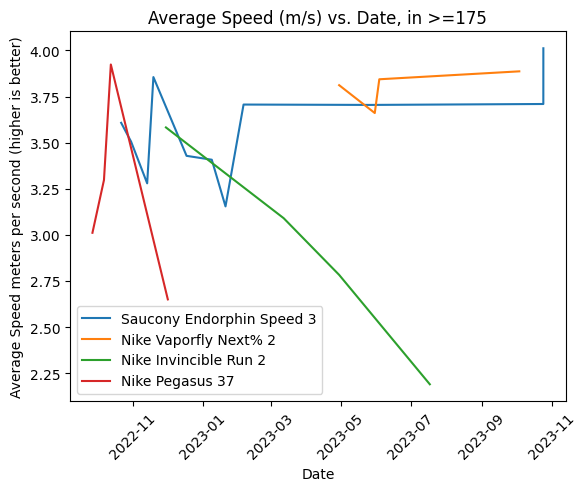

In [11]:
gear_naming = []
for my_gear in filtered_activities_df['gear_id'].unique():

    filtered_df = filtered_activities_df[filtered_activities_df['gear_id'] == str(my_gear)]
    gear_naming.append(gear_df.loc[gear_df['gear_id'] == str(my_gear), 'Name'].iloc[0])

    # Sort by 'start_date' for time-based plotting
    filtered_df = filtered_df.sort_values(by='start_date')

    # Plot 'average_heartrate' with error bars for 'deviation_heartrate'
    #plt.errorbar(filtered_df['start_date'], filtered_df['average_speed'], yerr=filtered_df['deviation_heartrate'], marker='o', linestyle='-')
    #plt.scatter(filtered_df['start_date'], filtered_df['average_speed'])
    plt.plot(filtered_df['start_date'], filtered_df['average_speed'])
    plt.xticks(rotation=45)
    
    #plt.legend(gear_df['Name'])

plt.xlabel('Date')
plt.ylabel('Average Speed meters per second (higher is better)')
plt.title('Average Speed (m/s) vs. Date, in >={}'.format(hpm_filter))
plt.legend(gear_naming)
plt.show()